## Entendendo TensorFlow


---
Autor: Felipe Colombelli
```
```
GitHub: @colombelli
```
```
Agradecimentos: Big Data University & Cognitive Class

https://www.youtube.com/watch?v=MrijcdNl_U4&list=PL-XeOa5hMEYxNzHM7YLRjIwE1k3VQpqEh&index=1

In [0]:
import tensorflow as tf

# Vamos começar construindo um grafo que utiliza 'source operations' e não 
# requer nenhum tipo de input

# Primeiro definimos duas constantes
a = tf.constant(3)
b = tf.constant(4)

# Fazemos, então, uma operação sobre esses valores
s = tf.add(a, b) 
# s = a + b também poderia ser utilizado para expressar a mesma coisa

In [0]:
# Vamos observar o valor de s
print(s)

Tensor("Add_5:0", shape=(), dtype=int32)


In [0]:
# Como grafos precisam ser executados no contexto de uma session,
# primeiro devemos definir esta session para que então possamos executá-lo

session = tf.Session()
resultado = session.run(s)
print(resultado)
print(s)

7
Tensor("Add_5:0", shape=(), dtype=int32)


In [0]:
# Para liberar recursos computacionais, podemos fechar a session
session.close()

In [0]:
# Para evitar fechar as sessions toda vez, podemos utilizá-las
# com um bloco with e, então, depois de executar todo o bloco,
# a session será fechada automaticamente

with tf.Session() as session:
  resultado = session.run(s)
  print(resultado)

7


In [0]:
# Tensors são simplesmente arrrays multi-dimensionais
matriz = tf.constant([[4,1,1],[3,2,2],[1,1,1]])
with tf.Session() as session:
  print(matriz)
  resultado = session.run(matriz)
  print(resultado)

Tensor("Const_2:0", shape=(3, 3), dtype=int32)
[[4 1 1]
 [3 2 2]
 [1 1 1]]


In [0]:
# Variables podem ser definidas da seguinte forma
estado = tf.Variable(0)

# Varibles precisam ser inicializadas antes de executar o grafo numa session
# Vamos criar um contador como exemplo

# Primeiro construimos o grafo
um = tf.constant(1)
novoValor = tf.add(estado, um)
update = tf.assign(estado, novoValor)

# Depois, inicializamos as variáveis
initOp = tf.global_variables_initializer()

In [0]:
# Finalmente podemos iniciar uma session e executar o grafo
with tf.Session() as session:
  session.run(initOp)
  print(session.run(estado))
  for i in range(3):
    session.run(update)
    print(session.run(estado))

0
1
2
3


In [0]:
# Se você quiser alimentar o TF com dados de fora do modelo,
# você precisará de placeholders

# Um placeholder pode ser pensado simplesmente como uma variable 
# que não vai de fato receber seu dado até um ponto mais adiante

# Para criar um placeholder, é necessário especificar um tipo de dado
# bem como sua precisão (32 bits, 64 bits, etc)

# Por exemplo
a = tf.placeholder(tf.float32)
b = a*2

# Agora, para rodar o grafo precisamos passar um valor para o placeholder
# Isso é feito através do argumento feed_dict, no qual você deve passar
# um dicionário com o nome do placeholder e o dado que ele passará a segurar

with tf.Session() as s:
  resultado = s.run(b, feed_dict={a:3.5})

print(resultado)

7.0


In [0]:
# A beleza da coisa é que podemos passar qualquer tipo de tensor como
# input para o placeholder e a operação será executada 

dicio = {a: [
    [2,3,4,5],
    [1,1,1,1],
    [3.2,4.5,1.4,2],
    [5,5,5,5]
]}

with tf.Session() as s:
  resultado = s.run(b, feed_dict=dicio)

print(resultado)

[[ 4.   6.   8.  10. ]
 [ 2.   2.   2.   2. ]
 [ 6.4  9.   2.8  4. ]
 [10.  10.  10.  10. ]]


## MLPs with TensorFlow

In [0]:
# Carregando o MNIST
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
# Normalização dos dados (imagens onde cada pixel tem um valor de 0 a 255)
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

(60000, 28, 28) (60000,)


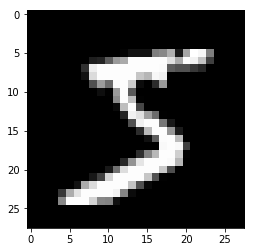

In [0]:
# Investigando dimensões
print(x_train.shape, y_train.shape)


# Visualização do primeiro dígito
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray");

In [0]:
# Transformando a matriz 28x28 em um array de tamanho 784
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))
print('Train dimension:')
print(x_train.shape)
print('Test dimension:')
print(x_test.shape)

Train dimension:
(60000, 784)
Test dimension:
(10000, 784)


In [0]:
# Entendendo o np.shape()
import numpy as np
a = np.array([
    
    [
    [1,1,1],
    [1,1,1],
    [1,1,1]
    ],
    
    [
    [2,2,2],
    [2,2,2],
    [2,2,2]
    ],
    
    [
    [3,3,3],
    [3,3,3],
    [3,3,3]
    ],
])

# O ponto é, os shapes devem ser compatíveis, se você tem um array 
# com 27 elementos, não pode dar reshape para 3x1, deve ser algo
# do tipo 3x9, 9x3, 3x3x3, 27, etc.
b = np.reshape(a, (a.shape[0], -1))
c = a.reshape(27)
print(a.shape, b.shape, c.shape)
print("\n", a, "\n\n", b, "\n\n", c)

(3, 3, 3) (3, 9) (27,)

 [[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]]] 

 [[1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]] 

 [1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3]


In [0]:
# Trocando as labels para one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

print("Novas dimensões")
print(y_train.shape)
print(y_test.shape)
print("\nExemplo de label para a primeira amostra de treino:")
print(y_train[0])

Novas dimensões
(60000, 10)
(10000, 10)

Exemplo de label para a primeira amostra de treino:
[0 0 0 0 0 1 0 0 0 0]


In [0]:
# Bibliotecas utilizadas para a construção da rede

import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
s = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
# Definição dos parâmetros de inicialização
# Modelo do tipo MLP com design 784-16-16-10

num_classes = y_train.shape[1]   # 10 classes representando os 10 dígitos
num_features = x_train.shape[1]  # 784 pixels (inputs ou features)
num_output = y_train.shape[1]    # 10 (vetor OHE)
num_layers_0 = 16
num_layers_1 = 16
learning_rate = 0.001

In [0]:
# Placeholders para o input de dados

# A primeira dimensão em shape com o valor None oferece flexibilidade
# para alimentar o placeholder com o número desejado de amostras
# Por exemplo, em batches, poderíamos feedar o placeholer com 32, 50, 40 ou 
# qualquer outro número de amostras de uma vez; ou para fazer a avaliação
# dos dados de teste, feedando o placeholder com todas as amostras

input_x = tf.placeholder('float32', shape =(None,num_features), name="input_x")
input_y = tf.placeholder('float32', shape =(None,num_classes), name="input_y")

In [0]:
# Os pesos e bias são inicializados por uma gaussiana com desvio padrão de = 1/sqrt(número de features)
# Onde o número de features é igual ao número de pixels, 784
weights_0 = tf.Variable(tf.random_normal([num_features, num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))

weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))

weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))

In [0]:
# Shape da matriz de pesos da primeira conexão entre camadas
tf.random_normal([num_features, num_layers_0], stddev=(1/tf.sqrt(float(num_features))))

<tf.Tensor 'random_normal_14:0' shape=(784, 16) dtype=float32>

In [0]:
# Shape dos biases da primeira conexão entre camadas
tf.Variable(tf.random_normal([num_layers_0]))

<tf.Variable 'Variable_14:0' shape=(16,) dtype=float32_ref>

In [0]:
# Construção do grafo:
# Hidden layers com ReLU como função de ativação
# e logits (as predições ainda não normalizadas) com Softmax

hidden_output_0 = tf.nn.relu(tf.matmul(input_x, weights_0) + bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0, weights_1) + bias_1)

predicted_y = tf.nn.softmax(tf.matmul(hidden_output_1, weights_2) + bias_2)

In [0]:
# Definição da loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y, labels=input_y))

In [0]:
# Adam optimzer para minimizar o custo
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [0]:
# Definição do cálculo de accuracy
# O parâmetro 1 em argmax significa que queremos procurar num array de 2-D
# Isso porque temos uma lista de predições, que por sua vez são uma lista
# em one-hot encoding
correct_prediction = tf.equal(tf.argmax(y_train, 1), tf.argmax(predicted_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Parâmetros de treino

batch_size = 5
epochs=5

training_accuracy = []
training_loss = []
testing_accuracy = []

In [0]:
# Indexação de numpy arrays

a = np.array(["a", "b", "c"])
print(a[[2,0,1]])

b = [0,0,0]
print(a[b])

c = [0,2]
print(a[c])

['c' 'a' 'b']
['a' 'a' 'a']
['a' 'c']


In [0]:
s.run(tf.global_variables_initializer())

for epoch in range(epochs):    
    
    arr = np.arange(x_train.shape[0])   # Constrói um array de 0 a 59999
    np.random.shuffle(arr)   # Randomiza a ordem desses valores no array
    
    # Loop de treino considerando treinamento em batches
    for index in range(0, x_train.shape[0], batch_size):
        s.run(optimizer, {
                          input_x: x_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]]
                         })
    
    
    # Coleta de métricas da epoch
    training_accuracy.append(s.run(accuracy, feed_dict= {
                                                         input_x:x_train, 
                                                         input_y: y_train
                                                        }))
    
    training_loss.append(s.run(loss, feed_dict= {
                                                  input_x: x_train, 
                                                  input_y: y_train
                                                }))
    
    # accuracy_score é uma função do scikit-learn que pede pelos parâmetros
    # (valores_reais, valores_preditos) e retorna a taxa de acertos
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(predicted_y, {input_x: x_test}).argmax(1)))

    print("Epoch:{0}, Train loss: {1} Train acc: {2}, Test acc:{3}".format(epoch,
                                                                    str(training_loss[epoch]),
                                                                    str(training_accuracy[epoch]),
                                                                    str(testing_accuracy[epoch])))

Epoch:0, Train loss: 1.622614 Train acc: 0.8406, Test acc:0.8397
Epoch:1, Train loss: 1.6164668 Train acc: 0.8454667, Test acc:0.8386
Epoch:2, Train loss: 1.6081836 Train acc: 0.8531, Test acc:0.8521
Epoch:3, Train loss: 1.6056552 Train acc: 0.85545, Test acc:0.8508
Epoch:4, Train loss: 1.6019961 Train acc: 0.8591667, Test acc:0.8525


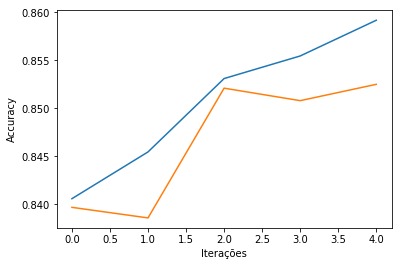

Accuracy de treino: 0.85917
Accuracy de teste:0.85250


In [0]:
# Plottando o gráfico da accuracy de treino e teste ao longo das iterações
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Iterações')
plt.show()
print("Accuracy de treino: {0:.5f}".format(training_accuracy[-1]))
print("Accuracy de teste:{0:.5f}".format(testing_accuracy[-1]))

# É importante sempre plottarmos tanto a accuracy de treino
# quanto a de teste para que assim possamos identificar
# rapidamente casos de overfitting